# Dataset
Language Detection: [A Dataset for Language Detection](https://www.kaggle.com/datasets/basilb2s/language-detection)

# Task:

Using the text we have to create a model which will be able to predict the given language.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# Read dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/NLP/Language_Detection/LanguageDetection.csv")

# Data Analysis on Dataframe

In [3]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
df.shape # get the size

(10337, 2)

In [5]:
df.columns # know what are the columns

Index(['Text', 'Language'], dtype='object')

In [6]:
df.info() # The info() method outputs some general information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [7]:
# The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.
df.describe()

,Text,Language
count,10337,10337
unique,10267,17
top,Jag är ledsen.,English
freq,3,1385


In [8]:
# Show entire dataframe of missing value
df.isnull()

,Text,Language
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10332,False,False
10333,False,False
10334,False,False
10335,False,False


In [9]:
# Check for missing value
df.isnull().any()

Text        False
Language    False
dtype: bool

In [10]:
# Let's have a look at the distribution of Text
df["Text"].value_counts()

Jag är ledsen.                                                                                                                                        3
i'm sorry.                                                                                                                                            3
Мне жаль.                                                                                                                                             3
souhaitée].                                                                                                                                           3
συγγνώμη.                                                                                                                                             3
                                                                                                                                                     ..
Il s'agit d'une œuvre libre, c'est-à-dire que chacun est libre de la rediffuser.        

In [11]:
df["Text"].value_counts(normalize=True)

Jag är ledsen.                                                                                                                                        0.000290
i'm sorry.                                                                                                                                            0.000290
Мне жаль.                                                                                                                                             0.000290
souhaitée].                                                                                                                                           0.000290
συγγνώμη.                                                                                                                                             0.000290
                                                                                                                                                        ...   
Il s'agit d'une œuvre libre, c'est-à-dire que 

In [12]:
df["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [13]:
df["Language"].value_counts(normalize=True)

English       0.133985
French        0.098094
Spanish       0.079230
Portugeese    0.071491
Italian       0.067524
Russian       0.066944
Sweedish      0.065396
Malayalam     0.057463
Dutch         0.052820
Arabic        0.051853
Turkish       0.045855
German        0.045468
Tamil         0.045371
Danish        0.041405
Kannada       0.035697
Greek         0.035310
Hindi         0.006095
Name: Language, dtype: float64

# Separating Independent and Dependent features

* The independent variable is the cause. Its value is independent of other variables in your study.
* The dependent variable is the effect. Its value depends on changes in the independent variable.

In Machine Learning:

* The dependent variable is the one **being trained on**, whereas,
* The independent variables are those being **used to train** the model.

In [14]:
# Independent Variable
X = df['Text']

In [15]:
# Dependent Variable
y = df['Language']

In [16]:
y

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object

# Label Encoding

- Output variable, the name of languages is a categorical variable.
- For training the model we should have to convert it into a numerical form,
- So we are performing label encoding on that output variable.

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le_obj = LabelEncoder()

### fit_transform(): Learn the parameters and apply the transformation to new data

In [19]:
y = le_obj.fit_transform(y)

In [20]:
print(y)

[3 3 3 ... 9 9 9]


# Creating a list for appending the preprocessed text

In [21]:
data_list = []

In [22]:
# iterating through all the text
for text in X:
  # removing the symbols and numbers
  text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
  text = re.sub(r'[[]]', ' ', text)

  # converting the text to lower case
  text = text.lower()

  # appending to data_list
  data_list.append(text)

In [23]:
# data_list

# Bag of Words

Not only the output feature but also the input feature should be of the numerical form.

So we are converting text into numerical form by creating a Bag of Words model using CountVectorizer.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer()

In [26]:
X = cv.fit_transform(data_list)

In [27]:
X

<10337x34937 sparse matrix of type '<class 'numpy.int64'>'
	with 166828 stored elements in Compressed Sparse Row format>

In [28]:
X = X.toarray()

In [29]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
X.shape

(10337, 34937)

# Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Model Training and Preprocessing
using the naive_bayes algorithm.

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
model = MultinomialNB()

In [35]:
model.fit(x_train, y_train)

MultinomialNB()

In [36]:
# Prediction
y_pred = model.predict(x_test)

In [37]:
y_pred

array([15,  4,  2, ..., 15, 13,  5])

# Model Evaluation

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
acurcy = accuracy_score(y_test, y_pred)

In [40]:
acurcy

0.9705029013539652

In [41]:
conf_mat = confusion_matrix(y_test, y_pred)

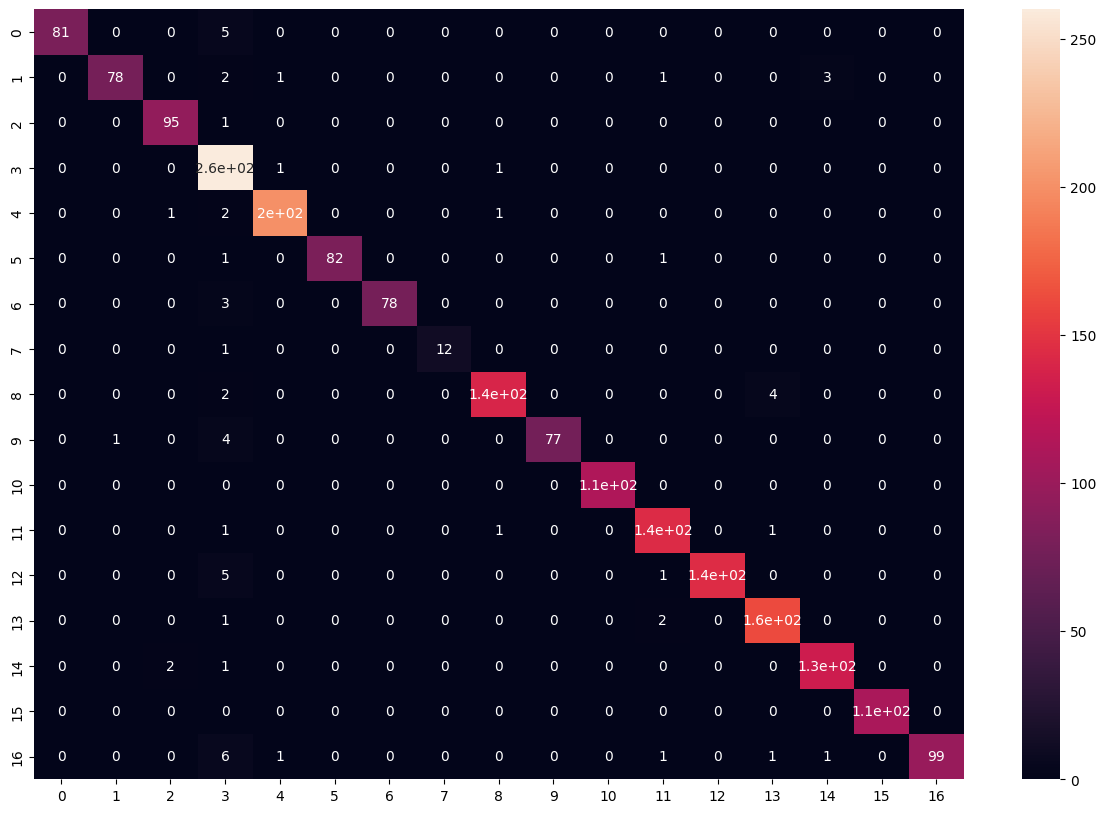

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(conf_mat, annot = True)
plt.show()

In [43]:
def lang_predict(text):
  # converting text to bag of words model (Vector)
  x = cv.transform([text]).toarray()

  # predicting the language
  lang = model.predict(x)

  # finding the language corresponding the the predicted value
  lang = le_obj.inverse_transform(lang)

  # printing the language
  print(lang)
  print("The langauge is in",lang[0])

In [44]:
# English
lang_predict(" provides a community based knowledge portal for Analytics and Data Science professionals")
# French
lang_predict(" fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données")
# Arabic
lang_predict("توفر  بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات")
# Spanish
lang_predict(" proporciona un portal de conocimiento basado en la comunidad para profesionales de Analytics y Data Science.")
# Malayalam
lang_predict("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")
# Russian
lang_predict(" - это портал знаний на базе сообщества для профессионалов в области аналитики и данных.")


['English']
The langauge is in English
['French']
The langauge is in French
['Arabic']
The langauge is in Arabic
['Spanish']
The langauge is in Spanish
['Malayalam']
The langauge is in Malayalam
['Russian']
The langauge is in Russian


# Pickle : Package Model.

In [47]:
import pickle

# Save the vectorizer
vec_file = 'vectorizer.pkl'
pickle.dump(cv, open(vec_file, 'wb'))


# Save the label encoder
enc_file = 'encoder.pkl'
pickle.dump(le_obj, open(enc_file, 'wb'))


# Save the model
with open('language_detection.pkl', 'wb') as f:
  pickle.dump(model, f)